In [10]:
!pip install textblob
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
import re 
import nltk 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [8]:
%matplotlib inline

In [9]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\mahee.LAPTOP-R4T
[nltk_data]     CP040\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\mahee.LAPTOP-R4TCP04
[nltk_data]     0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [11]:
print('Number of documents in the training set:', len(newsgroups_train.data))
print('Number of documents in the test set:', len(newsgroups_test.data))

Number of documents in the training set: 11314
Number of documents in the test set: 7532


In [12]:
def average_words(documents):
    total_words = 0
    for document in documents:
        total_words += len(document.split())
    return total_words / len(documents)

print('Average number of words per document in the training set:', average_words(newsgroups_train.data))
print('Average number of words per document in the test set:', average_words(newsgroups_test.data))

Average number of words per document in the training set: 287.4701255082199
Average number of words per document in the test set: 277.92671269251196


In [13]:
def vocabulary_size(documents):
    vocabulary = set()
    for document in documents:
        for word in document.split():
            vocabulary.add(word)
    return len(vocabulary)

print('Vocabulary size in the training set:', vocabulary_size(newsgroups_train.data))
print('Vocabulary size in the test set:', vocabulary_size(newsgroups_test.data))

Vocabulary size in the training set: 280308
Vocabulary size in the test set: 201144


In [14]:
print(newsgroups_train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [15]:
vectorizer = CountVectorizer()
vectorizer.fit(newsgroups_train.data)
X_train = vectorizer.transform(newsgroups_train.data)
feature_names = vectorizer.get_feature_names_out()
word_frequencies = X_train.sum(axis=0)
df_word_frequencies = pd.DataFrame({"Word": feature_names, "Frequency": word_frequencies.flat})
df_word_frequencies = df_word_frequencies.sort_values(by="Frequency", ascending=False)
print(df_word_frequencies.head(20))

        Word  Frequency
114455   the     146532
115475    to      75064
89362     of      69034
30827     ax      62406
28146    and      57957
66608     in      49401
68532     is      43480
114440  that      39264
68766     it      33638
56283    for      28600
128402   you      26682
56979   from      22670
50527    edu      21321
89860     on      20491
114731  this      20121
32311     be      19285
29241    are      18616
87949    not      18424
62221   have      18074
124616  with      17325


In [16]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
vectorizer.fit(newsgroups_train.data)
X_train = vectorizer.transform(newsgroups_train.data)
feature_names = vectorizer.get_feature_names_out()
bigram_frequencies = X_train.sum(axis=0)
df_bigram_frequencies = pd.DataFrame({"Bigram": feature_names, "Frequency": bigram_frequencies.flat})
df_bigram_frequencies = df_bigram_frequencies.sort_values(by="Frequency", ascending=False)
print(df_bigram_frequencies.head(20))

               Bigram  Frequency
171701          ax ax      56319
665262         of the      15462
487052         in the      10916
868275     subject re       7420
941597         to the       6066
482910     in article       5858
673967         on the       5809
513619          it is       4814
641304   nntp posting       4794
935552          to be       4791
729646   posting host       4786
391408        for the       4418
587245         max ax       4331
898148       that the       4322
171919         ax max       4314
477105         if you       3819
134178        and the       3757
1021835      with the       3138
925454        this is       3090
509273         is the       2963


In [17]:
vectorizer = CountVectorizer(ngram_range=(3, 3))
vectorizer.fit(newsgroups_train.data)
X_train = vectorizer.transform(newsgroups_train.data)
feature_names = vectorizer.get_feature_names_out()
trigram_frequencies = X_train.sum(axis=0)
df_trigram_frequencies = pd.DataFrame({"Trigram": feature_names, "Frequency": trigram_frequencies.flat})
df_trigram_frequencies = df_trigram_frequencies.sort_values(by="Frequency", ascending=False)
print(df_trigram_frequencies.head(20))

                            Trigram  Frequency
284922                     ax ax ax      50668
1127650           nntp posting host       4786
1036870                   max ax ax       4257
285094                    ax ax max       4200
285623                    ax max ax       4179
1240949  organization university of       1657
1945589           writes in article       1384
1216883                  one of the        791
695499                  g9v g9v g9v        658
1691039                 there is no        626
298797                   be able to        589
117941                  a86 a86 a86        481
1940965               would like to        471
482949                 cso uiuc edu        451
531477      distribution world nntp        441
908942                    it is not        441
1937013          world nntp posting        441
1626161               the fact that        441
1497875                 some of the        420
1592357                  that it is        417


In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) #Removing Special Characters
    text = re.sub(r'\s+', ' ', text) #Removing Extra Spaces
    text = text.strip() #Trimming: Removes leading and trailing whitespace.
    return text

In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text): 
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    return ' '.join(filtered_sentence)

In [20]:
newsgroups_train_clean = [remove_stopwords(document) for document in newsgroups_train.data]
newsgroups_test_clean = [remove_stopwords(document) for document in newsgroups_test.data]

In [21]:
vectorizer = TfidfVectorizer()
vectorizer.fit(newsgroups_train_clean)
X_train = vectorizer.transform(newsgroups_train_clean)
X_test = vectorizer.transform(newsgroups_test_clean)

In [22]:
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [23]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [24]:
y_pred = model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8100106213489113


In [26]:
classification_report_str = classification_report(y_test, y_pred, target_names=newsgroups_test.target_names)
print('\nClassification Report:\n', classification_report_str)


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.80      0.66      0.73       319
           comp.graphics       0.78      0.71      0.74       389
 comp.os.ms-windows.misc       0.79      0.69      0.74       394
comp.sys.ibm.pc.hardware       0.68      0.80      0.73       392
   comp.sys.mac.hardware       0.87      0.81      0.84       385
          comp.windows.x       0.86      0.78      0.82       395
            misc.forsale       0.88      0.78      0.83       390
               rec.autos       0.88      0.92      0.90       396
         rec.motorcycles       0.93      0.95      0.94       398
      rec.sport.baseball       0.92      0.91      0.92       397
        rec.sport.hockey       0.88      0.98      0.93       399
               sci.crypt       0.72      0.97      0.82       396
         sci.electronics       0.83      0.64      0.72       393
                 sci.med       0.92      0.78     

In [30]:
def document_lengths(documents):
    return [len(doc.split()) for doc in documents]

In [31]:
train_lengths = document_lengths(newsgroups_train.data)
test_lengths = document_lengths(newsgroups_test.data)

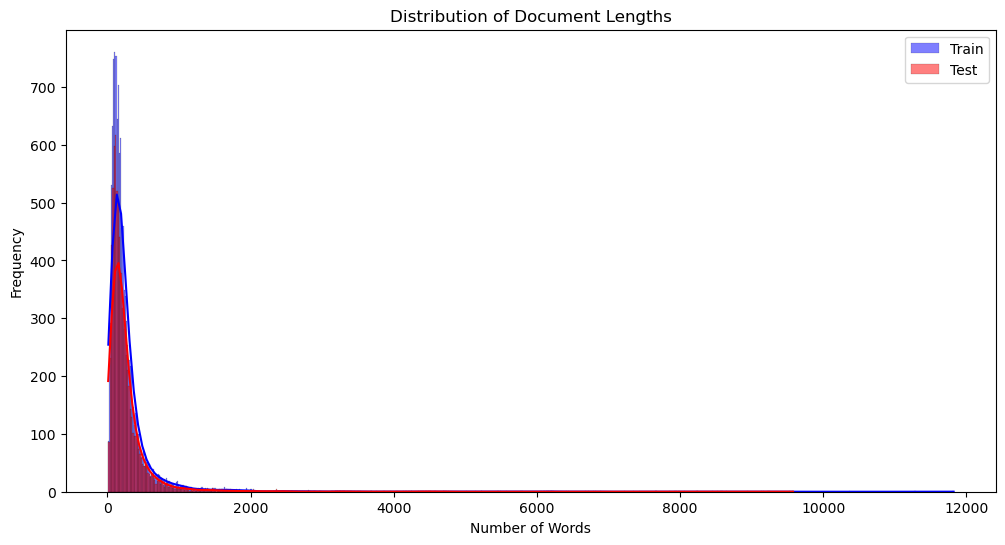

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(train_lengths, kde=True, color='blue', label='Train')
sns.histplot(test_lengths, kde=True, color='red', label='Test')
plt.title('Distribution of Document Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

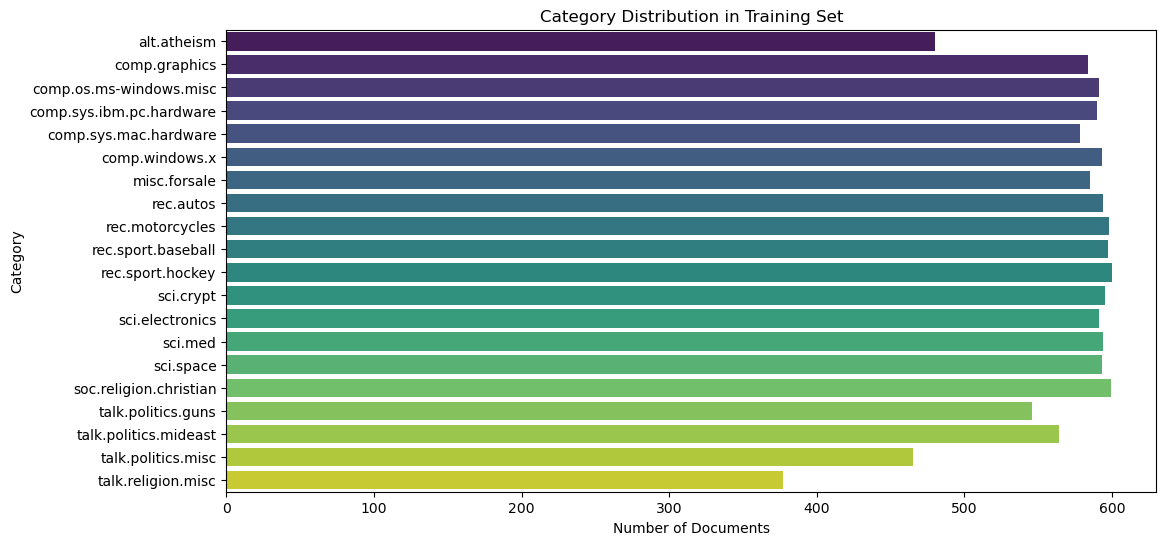

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(y=newsgroups_train.target, palette='viridis')
plt.yticks(ticks=range(len(newsgroups_train.target_names)), labels=newsgroups_train.target_names)
plt.title('Category Distribution in Training Set')
plt.xlabel('Number of Documents')
plt.ylabel('Category')
plt.show()


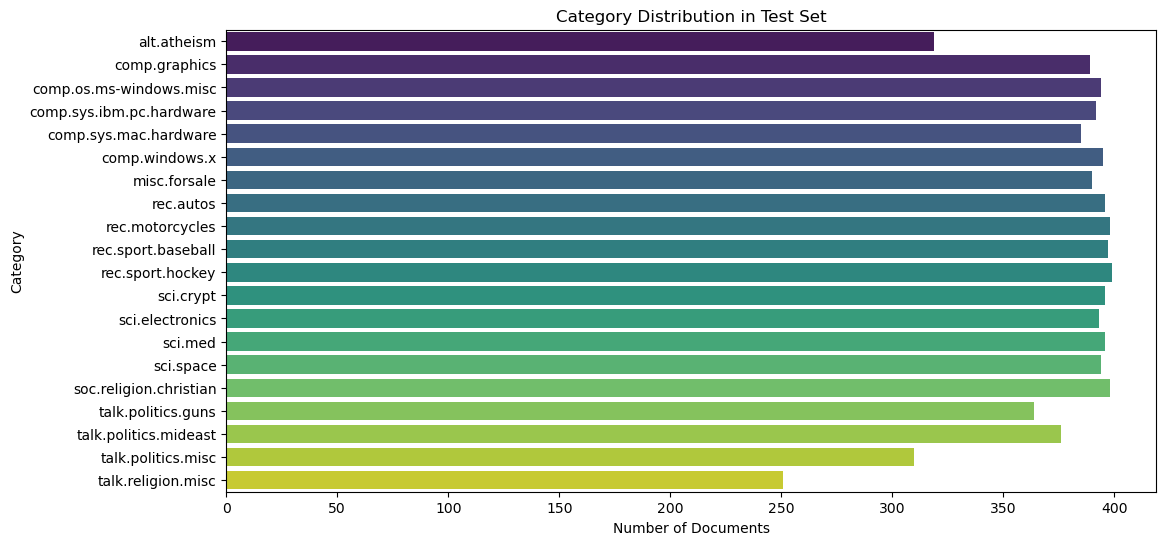

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(y=newsgroups_test.target, palette='viridis')
plt.yticks(ticks=range(len(newsgroups_test.target_names)), labels=newsgroups_test.target_names)
plt.title('Category Distribution in Test Set')
plt.xlabel('Number of Documents')
plt.ylabel('Category')
plt.show()

In [35]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

train_sentiments = [get_sentiment(document) for document in newsgroups_train_clean]
test_sentiments = [get_sentiment(document) for document in newsgroups_test_clean]

train_df = pd.DataFrame({'Text': newsgroups_train_clean, 'Sentiment': train_sentiments})
test_df = pd.DataFrame({'Text': newsgroups_test_clean, 'Sentiment': test_sentiments})


In [36]:
print('\nTraining set sentiment statistics:')
print(train_df['Sentiment'].describe())

print('\nTest set sentiment statistics:')
print(test_df['Sentiment'].describe())


Training set sentiment statistics:
count    11314.000000
mean         0.083413
std          0.129214
min         -1.000000
25%          0.011905
50%          0.088149
75%          0.162393
max          0.629167
Name: Sentiment, dtype: float64

Test set sentiment statistics:
count    7532.000000
mean        0.082035
std         0.130892
min        -1.000000
25%         0.011111
50%         0.086292
75%         0.161172
max         0.663900
Name: Sentiment, dtype: float64


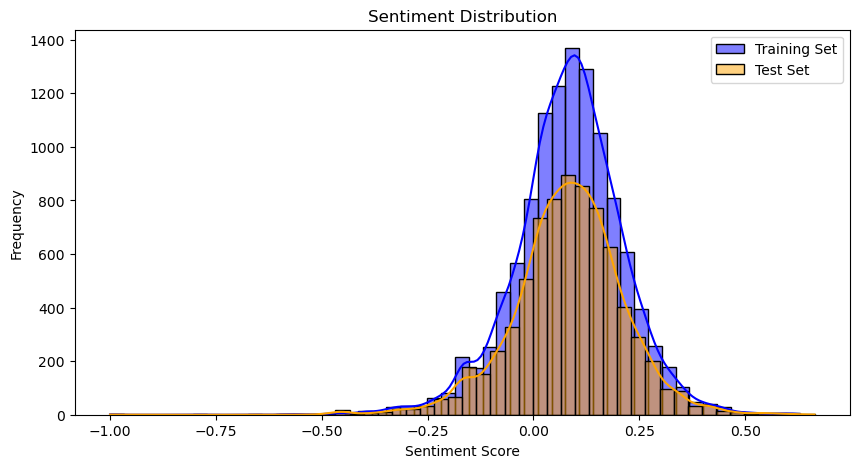

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df['Sentiment'], bins=50, kde=True, color='blue', label='Training Set')
sns.histplot(test_df['Sentiment'], bins=50, kde=True, color='orange', label='Test Set')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [38]:
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

train_sentiment_labels = [classify_sentiment(sentiment) for sentiment in train_sentiments]
test_sentiment_labels = [classify_sentiment(sentiment) for sentiment in test_sentiments]

train_df = pd.DataFrame({'Text': newsgroups_train_clean, 'Sentiment': train_sentiments, 'Sentiment_Label': train_sentiment_labels})
test_df = pd.DataFrame({'Text': newsgroups_test_clean, 'Sentiment': test_sentiments, 'Sentiment_Label': test_sentiment_labels})


In [39]:
print('\nTraining set sentiment statistics:')
print(train_df['Sentiment_Label'].value_counts())

print('\nTest set sentiment statistics:')
print(test_df['Sentiment_Label'].value_counts())


Training set sentiment statistics:
Positive    8856
Negative    2451
Neutral        7
Name: Sentiment_Label, dtype: int64

Test set sentiment statistics:
Positive    5853
Negative    1676
Neutral        3
Name: Sentiment_Label, dtype: int64


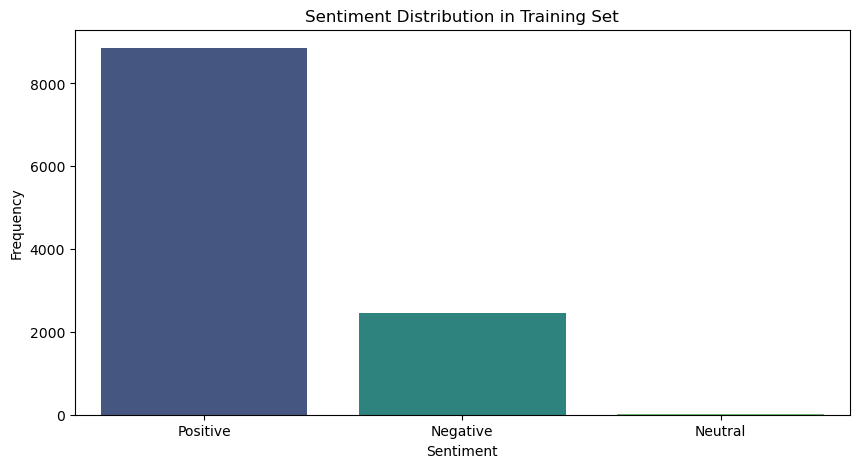

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sentiment_Label', data=train_df, palette='viridis', order=['Positive', 'Negative', 'Neutral'])
plt.title('Sentiment Distribution in Training Set')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

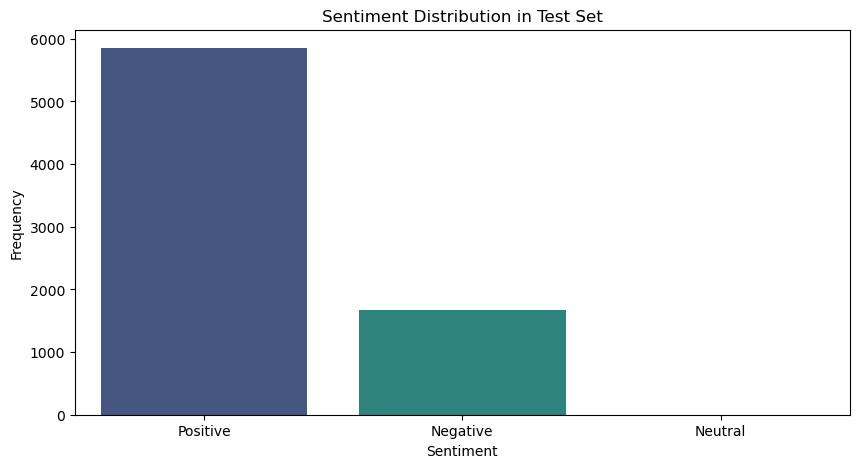

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sentiment_Label', data=test_df, palette='viridis', order=['Positive', 'Negative', 'Neutral'])
plt.title('Sentiment Distribution in Test Set')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [61]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred, target_names=newsgroups_test.target_names)}')
   

In [ ]:
return accuracy

In [58]:
nb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

nb_accuracy = evaluate_model(nb_model, X_train, y_train, X_test, y_test)
print('Evaluating Naive Bayes Model:')

Accuracy: 0.8100106213489113
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.66      0.73       319
           comp.graphics       0.78      0.71      0.74       389
 comp.os.ms-windows.misc       0.79      0.69      0.74       394
comp.sys.ibm.pc.hardware       0.68      0.80      0.73       392
   comp.sys.mac.hardware       0.87      0.81      0.84       385
          comp.windows.x       0.86      0.78      0.82       395
            misc.forsale       0.88      0.78      0.83       390
               rec.autos       0.88      0.92      0.90       396
         rec.motorcycles       0.93      0.95      0.94       398
      rec.sport.baseball       0.92      0.91      0.92       397
        rec.sport.hockey       0.88      0.98      0.93       399
               sci.crypt       0.72      0.97      0.82       396
         sci.electronics       0.83      0.64      0.72       393
                 sci.me

In [59]:
print('Evaluating Logistic Regression Model:')
lr_accuracy = evaluate_model(lr_model, X_train, y_train, X_test, y_test)

Evaluating Logistic Regression Model:
Accuracy: 0.8327137546468402
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.81      0.73      0.76       319
           comp.graphics       0.70      0.79      0.74       389
 comp.os.ms-windows.misc       0.76      0.75      0.75       394
comp.sys.ibm.pc.hardware       0.70      0.73      0.72       392
   comp.sys.mac.hardware       0.81      0.83      0.82       385
          comp.windows.x       0.82      0.75      0.79       395
            misc.forsale       0.79      0.87      0.83       390
               rec.autos       0.91      0.90      0.90       396
         rec.motorcycles       0.94      0.95      0.95       398
      rec.sport.baseball       0.88      0.93      0.91       397
        rec.sport.hockey       0.94      0.96      0.95       399
               sci.crypt       0.96      0.91      0.93       396
         sci.electronics       0.74      0.79      

In [49]:
print('Evaluating Random Forest Model:')
rf_accuracy = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

Evaluating Random Forest Model:
Accuracy: 0.7822623473181094
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.76      0.66      0.70       319
           comp.graphics       0.62      0.71      0.66       389
 comp.os.ms-windows.misc       0.66      0.77      0.71       394
comp.sys.ibm.pc.hardware       0.69      0.67      0.68       392
   comp.sys.mac.hardware       0.77      0.78      0.77       385
          comp.windows.x       0.78      0.73      0.75       395
            misc.forsale       0.77      0.91      0.83       390
               rec.autos       0.87      0.81      0.84       396
         rec.motorcycles       0.91      0.90      0.90       398
      rec.sport.baseball       0.86      0.92      0.89       397
        rec.sport.hockey       0.88      0.93      0.91       399
               sci.crypt       0.89      0.92      0.90       396
         sci.electronics       0.71      0.56      0.63  

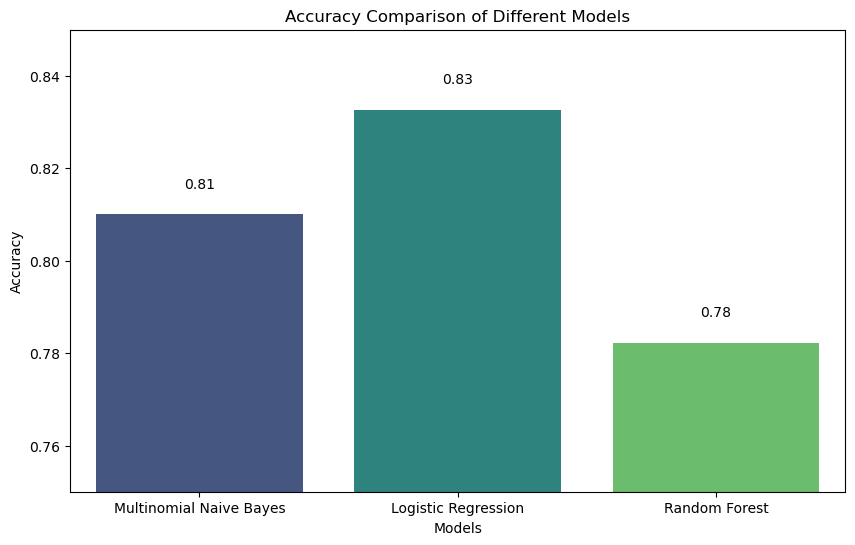

In [62]:
models = ['Multinomial Naive Bayes', 'Logistic Regression', 'Random Forest']
accuracies = [0.8100106213489113, 0.8327137546468402, 0.7822623473181094]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.75, 0.85)
for index, accuracy in enumerate(accuracies):
    plt.text(index, accuracy + 0.005, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()